In [7]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv("../data/processed/game_stats.csv")
print(df.shape)
df.head()

(4096, 10)


,plays,total_yards,yards_per_play,rush_pass_ratio,turnover_diff,avg_epa,fg_made,fg_missed,first_downs,win
0,88,476,5.409090,0.511111,4,-0.053598,88,88,23.0,0
1,77,425,5.519480,0.657895,2,-0.108512,77,77,24.0,0
2,81,312,3.851851,0.648648,0,-0.102284,81,81,21.0,1
3,70,413,5.899999,0.687500,4,-0.315955,70,70,24.0,0
4,105,600,5.714285,0.891304,2,0.124237,105,105,33.0,1


In [11]:
# Features and target
feature_cols = [
    "plays", "total_yards", "yards_per_play", "rush_pass_ratio",
    "turnover_diff", "avg_epa", "fg_made", "fg_missed", "first_downs"
]
target_col = "win"

X = df[feature_cols]
y = df[target_col]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 3276
Test samples: 820


In [12]:
# Initialize model
model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
model.fit(X_train, y_train)


/Users/varunkumartangudu/Desktop/Project/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:56:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


Accuracy: 0.744
ROC-AUC: 0.850

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       446
           1       0.71      0.73      0.72       374

    accuracy                           0.74       820
   macro avg       0.74      0.74      0.74       820
weighted avg       0.74      0.74      0.74       820



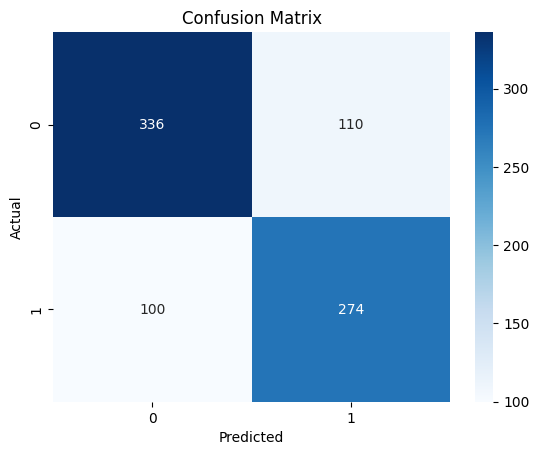

In [13]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


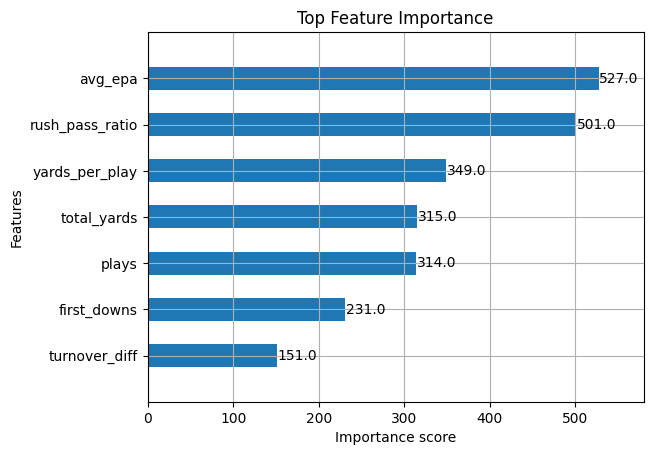

In [14]:
# Plot feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("Top Feature Importance")
plt.show()


In [22]:
import os

# Create folder if it doesn't exist
os.makedirs("../models", exist_ok=True)


In [24]:
import pickle

model_path = "../models/xgb_nfl_model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(model, f)

print(f"✅ Model saved to {model_path}")


✅ Model saved to ../models/xgb_nfl_model.pkl
